In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv('C:/Users/Dell/Desktop/timesData.csv')

In [3]:
df = df.query('year==2016')

In [4]:
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46:54:00,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42:58:00,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,"18,812",11.8,34%,46:54:00,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,92,"11,074",9.0,33%,37 : 63,2016


In [5]:
df.isnull().sum()

world_rank                 0
university_name            0
country                    0
teaching                   0
international              0
research                   0
citations                  0
income                     0
total_score                0
num_students               7
student_staff_ratio        7
international_students    10
female_male_ratio         61
year                       0
dtype: int64

In [6]:
#dropping missing values
df.dropna(subset=['num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio'], inplace=True)

In [7]:
df.isnull().sum()

world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64

In [8]:
#removing hyphens, commas and % symbol from the rows
df=df[~df.income.str.contains("-")]
df['total_score'] = df['total_score'].apply(lambda x: float(x.split()[0].replace('-', '45')))
df['num_students'] = df['num_students'].apply(lambda x: float(x.split()[0].replace(',', '')))
df['international_students'] = df['international_students'].map(lambda x: x.rstrip('%'))
df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,95.2,2243.0,6.9,27,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34,46:54:00,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22,42:58:00,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,18812.0,11.8,34,46:54:00,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,92.0,11074.0,9.0,33,37 : 63,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,27,45:55:00,2016
1810,8,Imperial College London,United Kingdom,83.3,96,88.5,96.7,53.7,89.1,15060.0,11.7,51,37 : 63,2016
1811,9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80,88.3,18178.0,14.7,37,31 : 69,2016
1812,10,University of Chicago,United States of America,85.7,65,88.9,99.2,36.6,87.9,14221.0,6.9,21,42:58:00,2016
1813,11,Johns Hopkins University,United States of America,77.6,70,90.4,98.2,100,87.6,15128.0,3.6,23,50:50:00,2016


In [9]:
#converting ratio (string) to decimal (float)
df = df[~df.female_male_ratio.str.contains("-")]
df['female_male_ratio'] = df['female_male_ratio'].map(lambda x: x.rstrip(':00'))
for x in range(len(df)):
    idx = df.iloc[x].name
    fmr=df['female_male_ratio'].iloc[x]
    if type(fmr)!=float:
        if ":" in fmr:
            str_arr=fmr.split(':')
            dec_value=float(str_arr[0])/float(str_arr[1])
            df.set_value(idx, 'female_male_ratio', dec_value)
df

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64,97.6,99.8,97.8,95.2,2243.0,6.9,27,0.492537,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34,0.851852,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22,0.724138,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,18812.0,11.8,34,0.851852,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84,88.6,99.7,95.4,92.0,11074.0,9.0,33,0.587302,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,27,0.818182,2016
1810,8,Imperial College London,United Kingdom,83.3,96,88.5,96.7,53.7,89.1,15060.0,11.7,51,0.587302,2016
1811,9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80,88.3,18178.0,14.7,37,0.449275,2016
1812,10,University of Chicago,United States of America,85.7,65,88.9,99.2,36.6,87.9,14221.0,6.9,21,0.724138,2016
1813,11,Johns Hopkins University,United States of America,77.6,70,90.4,98.2,100,87.6,15128.0,3.6,23,10,2016


In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
df.drop(["university_name"], axis = 1, inplace = True)
df

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,United States of America,95.6,64,97.6,99.8,97.8,95.2,2243.0,6.9,27,0.492537,2016
1804,2,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34,0.851852,2016
1805,3,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22,0.724138,2016
1806,4,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,18812.0,11.8,34,0.851852,2016
1807,5,United States of America,89.4,84,88.6,99.7,95.4,92.0,11074.0,9.0,33,0.587302,2016
1809,7,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,27,0.818182,2016
1810,8,United Kingdom,83.3,96,88.5,96.7,53.7,89.1,15060.0,11.7,51,0.587302,2016
1811,9,Switzerland,77.0,97.9,95.0,91.1,80,88.3,18178.0,14.7,37,0.449275,2016
1812,10,United States of America,85.7,65,88.9,99.2,36.6,87.9,14221.0,6.9,21,0.724138,2016
1813,11,United States of America,77.6,70,90.4,98.2,100,87.6,15128.0,3.6,23,10,2016


In [12]:
X=df[['country','teaching','international', 'research', 'citations', 'income', 'num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio']]
y=df['total_score']
X

,country,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,female_male_ratio
1803,United States of America,95.6,64,97.6,99.8,97.8,2243.0,6.9,27,0.492537
1804,United Kingdom,86.5,94.4,98.9,98.8,73.1,19919.0,11.6,34,0.851852
1805,United States of America,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22,0.724138
1806,United Kingdom,88.2,91.5,96.7,97.0,55,18812.0,11.8,34,0.851852
1807,United States of America,89.4,84,88.6,99.7,95.4,11074.0,9.0,33,0.587302
1809,United States of America,85.1,78.5,91.9,99.3,52.1,7929.0,8.4,27,0.818182
1810,United Kingdom,83.3,96,88.5,96.7,53.7,15060.0,11.7,51,0.587302
1811,Switzerland,77.0,97.9,95.0,91.1,80,18178.0,14.7,37,0.449275
1812,United States of America,85.7,65,88.9,99.2,36.6,14221.0,6.9,21,0.724138
1813,United States of America,77.6,70,90.4,98.2,100,15128.0,3.6,23,10


In [13]:
#getting dummy variables for country
one_hot = pd.get_dummies(X['country'])
X = X.drop('country',axis = 1)
X = X.join(one_hot)
X  

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,female_male_ratio,Argentina,...,Sweden,Switzerland,Taiwan,Thailand,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States of America
1803,95.6,64,97.6,99.8,97.8,2243.0,6.9,27,0.492537,0,...,0,0,0,0,0,0,0,0,0,1
1804,86.5,94.4,98.9,98.8,73.1,19919.0,11.6,34,0.851852,0,...,0,0,0,0,0,0,0,0,1,0
1805,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22,0.724138,0,...,0,0,0,0,0,0,0,0,0,1
1806,88.2,91.5,96.7,97.0,55,18812.0,11.8,34,0.851852,0,...,0,0,0,0,0,0,0,0,1,0
1807,89.4,84,88.6,99.7,95.4,11074.0,9.0,33,0.587302,0,...,0,0,0,0,0,0,0,0,0,1
1809,85.1,78.5,91.9,99.3,52.1,7929.0,8.4,27,0.818182,0,...,0,0,0,0,0,0,0,0,0,1
1810,83.3,96,88.5,96.7,53.7,15060.0,11.7,51,0.587302,0,...,0,0,0,0,0,0,0,0,1,0
1811,77.0,97.9,95.0,91.1,80,18178.0,14.7,37,0.449275,0,...,0,1,0,0,0,0,0,0,0,0
1812,85.7,65,88.9,99.2,36.6,14221.0,6.9,21,0.724138,0,...,0,0,0,0,0,0,0,0,0,1
1813,77.6,70,90.4,98.2,100,15128.0,3.6,23,10,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
#standardization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[1.        , 0.61314655, 0.98609626, ..., 0.        , 0.        ,
        1.        ],
       [0.89381564, 0.94073276, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.9638273 , 0.74568966, 0.97112299, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.05367561, 0.08405172, 0.02352941, ..., 0.        , 0.        ,
        0.        ],
       [0.11901984, 0.17456897, 0.11336898, ..., 0.        , 0.        ,
        0.        ],
       [0.07351225, 0.11422414, 0.13796791, ..., 0.        , 0.        ,
        0.        ]])

In [15]:
#splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)

SVR

In [16]:
reg = svm.SVR()
reg.fit(X_train, y_train)
reg.predict(X_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

array([45.09851147, 45.1148025 , 44.83260735, 45.01823987, 45.14037982,
       45.67457619, 45.17035379, 45.02913325, 44.9002684 , 45.54258986,
       45.26247573, 44.94812258, 45.101339  , 45.10045881, 44.99781355,
       44.90032593, 45.09415314, 45.68661941, 45.16084244, 44.92777673,
       45.90529648, 45.07002226, 44.97448633, 45.35487029, 44.91890733,
       45.25155678, 45.30234191, 45.02810564, 44.92102079, 45.09391165,
       45.43576001, 45.09990434, 45.24143702, 44.98970887, 45.66239299,
       45.20395509, 45.40511585, 45.12376597, 45.38180432, 45.36374143,
       45.23281781, 45.65052508, 45.1943334 , 45.16669329, 44.99912407,
       45.36459046, 46.36389495, 45.44235158, 46.25418293, 45.06472816,
       44.97998021, 44.96467101, 44.95634816, 45.24975949, 44.98416441,
       45.17861295, 44.92128808, 45.13044507, 44.97286601, 44.83579927,
       45.20065755, 44.81297974, 45.18684301, 45.95775815, 45.25793934,
       44.98771536, 44.96561195, 46.27391056, 44.93400257, 45.25

In [17]:
reg.score(X_test, y_test)

-0.20322814728413197

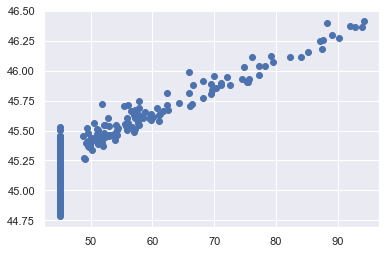

In [18]:
#plotting training observations with training predicted values
pred=reg.predict(X_train)
plt.scatter(y_train, pred, cmap='autumn')

In [19]:
#converting bins to integers for data analysis
df['world_rank'] = df['world_rank'].apply(lambda x: float(x.split()[0].replace('-', '')))
df['world_rank'] = df['world_rank'].apply(lambda x: float((str(x).replace('201250', '201'))))
df['world_rank'] = df['world_rank'].apply(lambda x: float((str(x).replace('251300', '251'))))
df['world_rank'] = df['world_rank'].apply(lambda x: float((str(x).replace('301350', '301'))))
df['world_rank'] = df['world_rank'].apply(lambda x: float((str(x).replace('351400', '351'))))
df['world_rank'] = df['world_rank'].apply(lambda x: float((str(x).replace('401500', '401'))))
df['world_rank'] = df['world_rank'].apply(lambda x: float((str(x).replace('501600', '501'))))
df['world_rank'] = df['world_rank'].apply(lambda x: float((str(x).replace('601800', '601'))))
print (df['world_rank'])

1803      1.0
1804      2.0
1805      3.0
1806      4.0
1807      5.0
1809      7.0
1810      8.0
1811      9.0
1812     10.0
1813     11.0
1814     12.0
1815     13.0
1816     14.0
1818     16.0
1819     17.0
1820     18.0
1822     20.0
1823     21.0
1824     22.0
1826     24.0
1827     25.0
1828     26.0
1829     27.0
1830     28.0
1831     29.0
1832     30.0
1833     31.0
1834     32.0
1835     33.0
1836     34.0
        ...  
2568    601.0
2569    601.0
2570    601.0
2571    601.0
2572    601.0
2576    601.0
2577    601.0
2578    601.0
2579    601.0
2580    601.0
2581    601.0
2582    601.0
2583    601.0
2584    601.0
2585    601.0
2586    601.0
2587    601.0
2588    601.0
2589    601.0
2590    601.0
2591    601.0
2592    601.0
2593    601.0
2594    601.0
2596    601.0
2597    601.0
2598    601.0
2599    601.0
2601    601.0
2602    601.0
Name: world_rank, Length: 702, dtype: float64


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [20]:
Y=df['world_rank']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, random_state=1)

SVM

In [21]:
clf = svm.SVC(kernel='poly') # Polynomial Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
y_pred

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

array([601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 60

In [22]:
clf1 = svm.SVC(kernel='sigmoid') # Non-Linear Kernel
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_train)
y_pred1

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

array([601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 601., 601., 601., 601.,
       601., 601., 601., 601., 601., 601., 601., 60

In [23]:
test_pred=clf1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))

Accuracy: 0.2159090909090909


In [24]:
print(confusion_matrix(y_test, test_pred))

[[ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  1]
 ...
 [ 0  0  0 ...  0  0 26]
 [ 0  0  0 ...  0  0 22]
 [ 0  0  0 ...  0  0 38]]


In [25]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         1
        21.0       0.00      0.00      0.00         1
        24.0       0.00      0.00      0.00         1
        28.0       0.00      0.00      0.00         1
        36.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         2
        47.0       0.00      0.00      0.00         1
        54.0       0.00      0.00      0.00         1
        56.0       0.00      0.00      0.00         1
        58.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00         1
        67.0       0.00      0.00      0.00         1
        68.0       0.00      0.00      0.00         1
        70.0       0.00    

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
#Cross Validation to study the effect of hyperparamter C in SVC model
C_range = list(range(1, 10))
accuracy = []
cv_scores_list=[]
train_data=(X_train, y_train)
for this_C in C_range:
    clf2 = svm.SVC(gamma='auto', C=this_C) 
    clf2.fit(X_train, y_train)
    print('C:', this_C)
    score = clf2.score(X_test, y_test)
    print('Accuracy:', score)
    cv_scores = cross_val_score(clf2, X_scaled, Y,cv=5)
    cv_scores_list.append(np.mean(cv_scores))
    print('Mean cross-validation Error score (5-fold): {:.3f}'.format(1-np.mean(cv_scores)))
    yfit = clf2.predict(X_train)
    Mis=list(yfit!=y_train)
    print('Misclassified Training Error:', Mis.count(True))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

C: 1
Accuracy: 0.2159090909090909


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Mean cross-validation Error score (5-fold): 0.738
Misclassified Training Error: 398


SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

C: 2
Accuracy: 0.2215909090909091


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Mean cross-validation Error score (5-fold): 0.730
Misclassified Training Error: 387


SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

C: 3
Accuracy: 0.22727272727272727


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Mean cross-validation Error score (5-fold): 0.713
Misclassified Training Error: 384


SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

C: 4
Accuracy: 0.23863636363636365


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Mean cross-validation Error score (5-fold): 0.699
Misclassified Training Error: 378


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

C: 5
Accuracy: 0.2784090909090909


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Mean cross-validation Error score (5-fold): 0.681
Misclassified Training Error: 350


SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

C: 6
Accuracy: 0.29545454545454547


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Mean cross-validation Error score (5-fold): 0.659
Misclassified Training Error: 345


SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

C: 7
Accuracy: 0.30113636363636365


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Mean cross-validation Error score (5-fold): 0.648
Misclassified Training Error: 329


SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

C: 8
Accuracy: 0.3125


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Mean cross-validation Error score (5-fold): 0.626
Misclassified Training Error: 326


SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

C: 9
Accuracy: 0.3068181818181818


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Mean cross-validation Error score (5-fold): 0.622
Misclassified Training Error: 319
